Graph successfully loaded with 1226 nodes and 2410 edges.


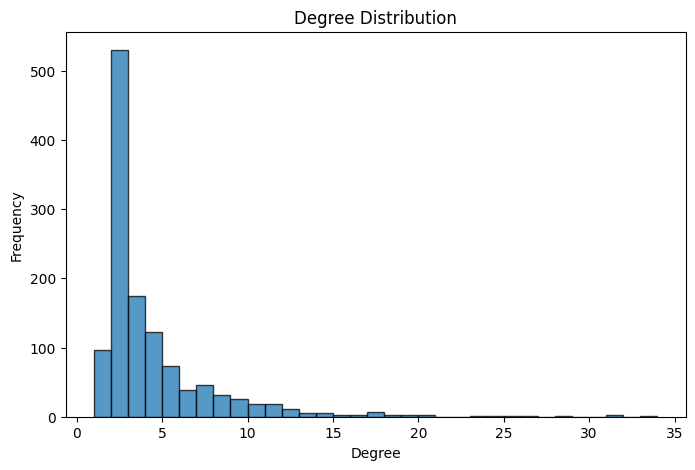

Max Degree: 34
Min Degree: 1
Average Degree: 3.93
Standard Deviation: 3.68


In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

file_path = r"/Users/harshil/SNUC_Subjects/Sem 6/SNA/SNA - Air Traffic Control/out.maayan-faa"

# Read the file while ignoring comment lines
with open(file_path, "r") as f:
    lines = [line.strip() for line in f if not line.startswith("%")]

# Create a graph
G = nx.parse_edgelist(lines, nodetype=int)  # Ensure nodes are integers
# ------------------------- PLOT 1: Degree Distribution ------------------------- #

print("Graph successfully loaded with", G.number_of_nodes(), "nodes and", G.number_of_edges(), "edges.")
degrees = [d for _, d in G.degree()]
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor="black", alpha=0.75)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

max_degree = max(degrees)
min_degree = min(degrees)
average_degree = np.mean(degrees)
std_dev_degree = np.std(degrees)

print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {average_degree:.2f}")
print(f"Standard Deviation: {std_dev_degree:.2f}")

In [5]:
pip install --upgrade networkx matplotlib



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


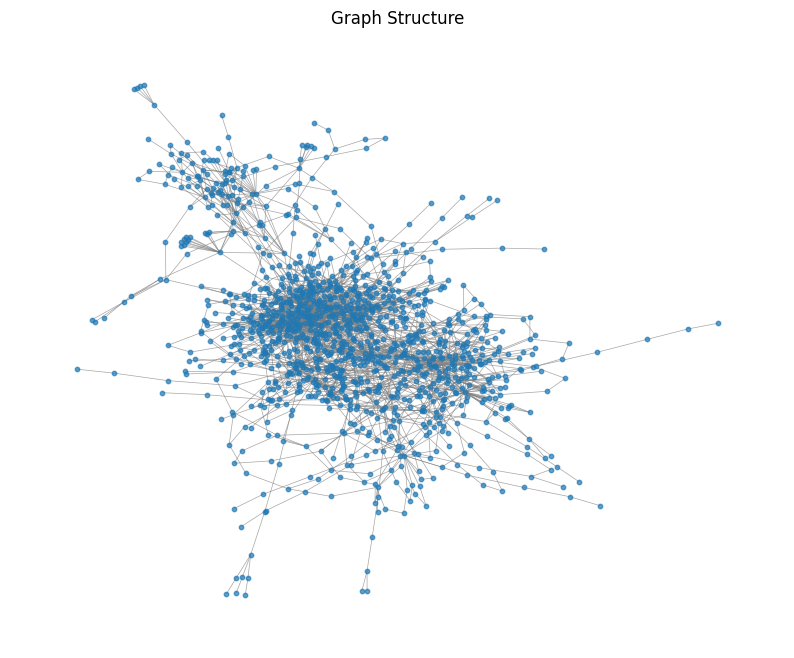

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, ax=ax, node_size=10, edge_color="gray", alpha=0.7, width=0.5)  
plt.title("Graph Structure")  
plt.show()


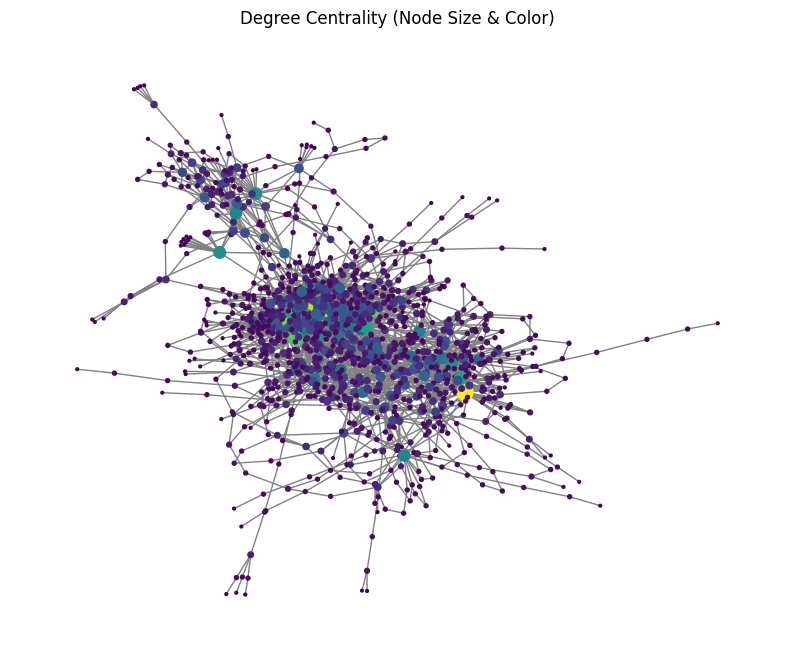

Node with highest degree centrality: 312, Centrality: 0.027755102040816326


In [7]:
# ------------------------- Centrality Measures ------------------------- #
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=1.0)
pagerank_centrality = nx.pagerank(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# ------------------------- PLOT 3: Degree Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
node_sizes = [5000 * degree_centrality[node] for node in G]  # Scale node size
nx.draw(G, pos, ax, node_size=node_sizes, node_color=list(degree_centrality.values()), cmap=plt.cm.viridis, edge_color="gray")
plt.title("Degree Centrality (Node Size & Color)")
plt.show()

max_node = max(degree_centrality, key=degree_centrality.get)
max_centrality = degree_centrality[max_node]

print(f"Node with highest degree centrality: {max_node}, Centrality: {max_centrality}")


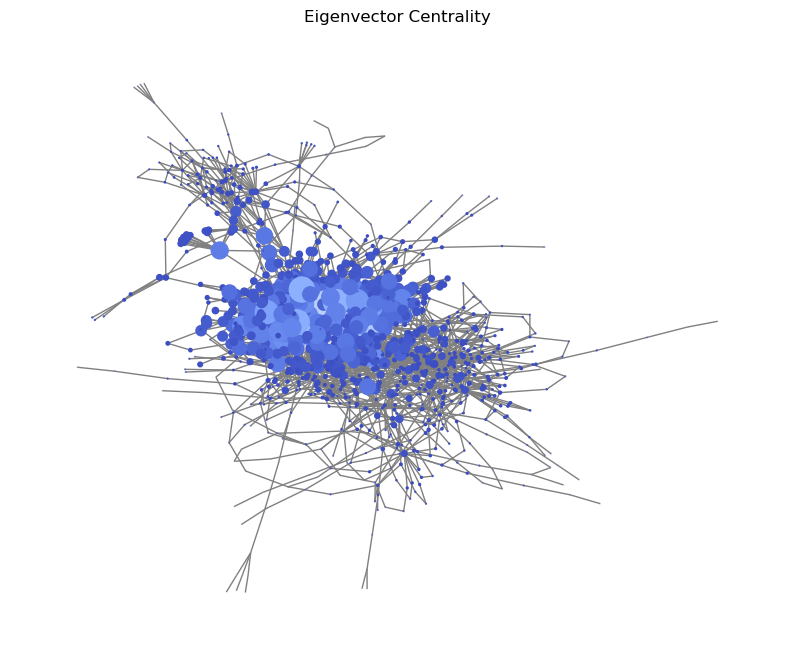

In [23]:
# ------------------------- PLOT 4: Eigenvector Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
node_sizes = [5000 * eigenvector_centrality[node] for node in G]
nx.draw(G, pos, ax, node_size=node_sizes, node_color=list(eigenvector_centrality.values()), cmap=plt.cm.coolwarm, edge_color="gray")
plt.title("Eigenvector Centrality")
plt.show()

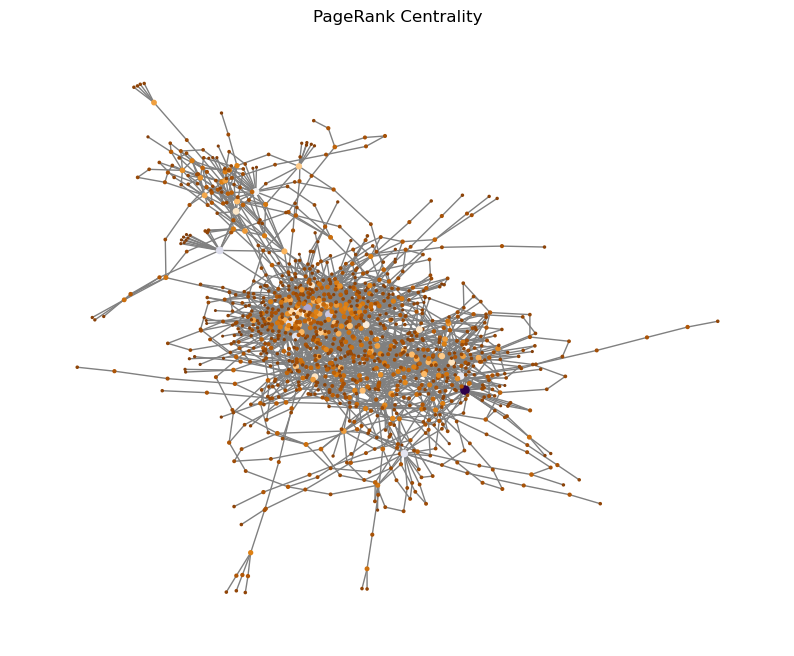

In [25]:
# ------------------------- PLOT 5: PageRank Centrality ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
node_sizes = [5000 * pagerank_centrality[node] for node in G]
nx.draw(G, pos, ax, node_size=node_sizes, node_color=list(pagerank_centrality.values()), cmap=plt.cm.PuOr, edge_color="gray")
plt.title("PageRank Centrality")
plt.show()

/var/folders/4p/7vfgzzfn7q5dmq63pxmv3dlm0000gn/T/ipykernel_97477/467807081.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label="Local Clustering Coefficient")


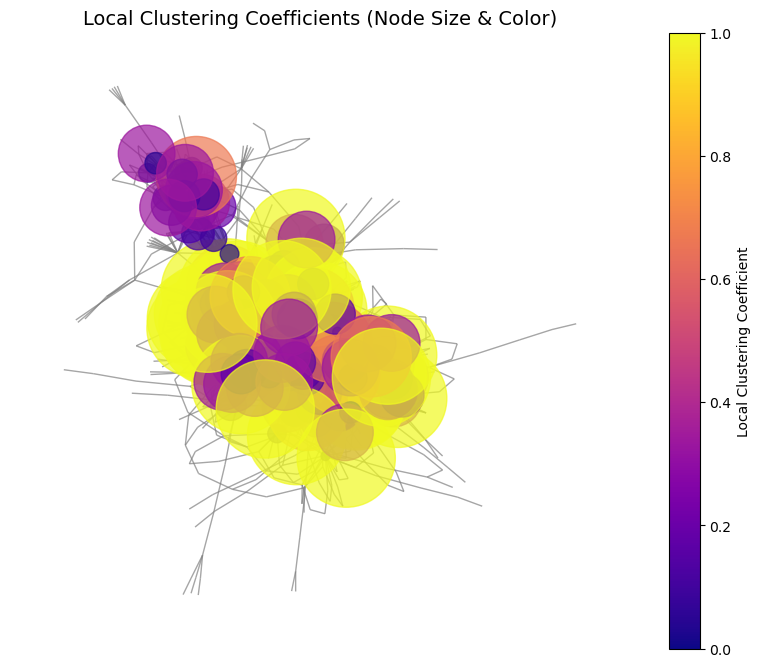

In [26]:
# ------------------------- Clustering Coefficients ------------------------- #
local_clustering = nx.clustering(G)
global_clustering = nx.transitivity(G)
average_local_clustering = np.mean(list(local_clustering.values()))

# ------------------------- PLOT: Local Clustering Coefficients ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization

# Set node colors based on clustering coefficient
node_colors = list(local_clustering.values())

# Scale node size based on clustering coefficient (higher = larger)
node_sizes = [5000 * local_clustering[node] for node in G]

# Draw the graph with clustering coefficients
nx.draw(
    G,
    pos,
    ax,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma,  # Color map for clustering coefficient
    edge_color="gray",
    alpha=0.7
)

plt.title("Local Clustering Coefficients (Node Size & Color)", fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label="Local Clustering Coefficient")
plt.show()

Global Clustering Coefficient: 0.0639
Average Local Clustering Coefficient: 0.0675


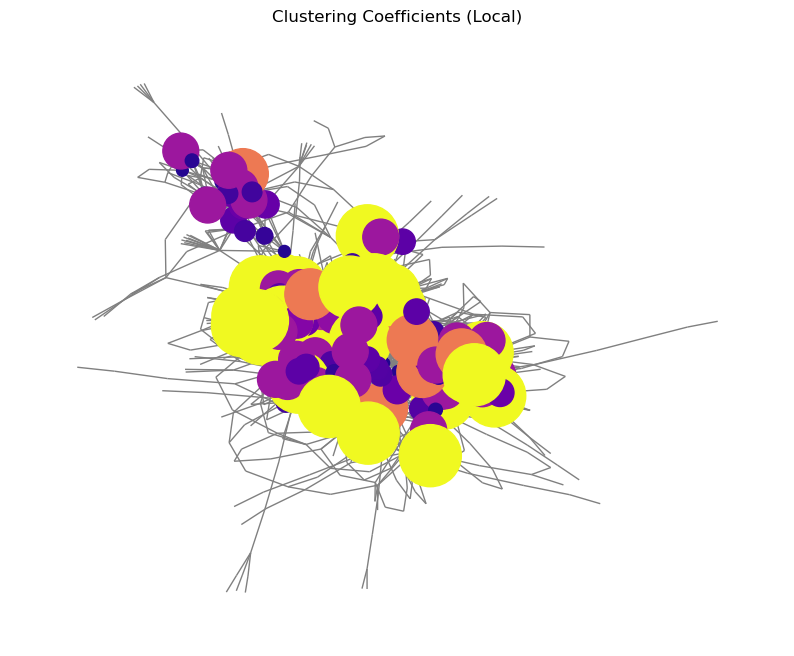

In [27]:
print(f"Global Clustering Coefficient: {global_clustering:.4f}")
print(f"Average Local Clustering Coefficient: {average_local_clustering:.4f}")

# ------------------------- PLOT 6: Clustering Coefficients ------------------------- #
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
node_sizes = [2000 * local_clustering[node] for node in G]
nx.draw(G, pos, ax, node_size=node_sizes, node_color=list(local_clustering.values()), cmap=plt.cm.plasma, edge_color="gray")
plt.title("Clustering Coefficients (Local)")
plt.show()


Global Clustering Coefficient (Transitivity): 0.0639


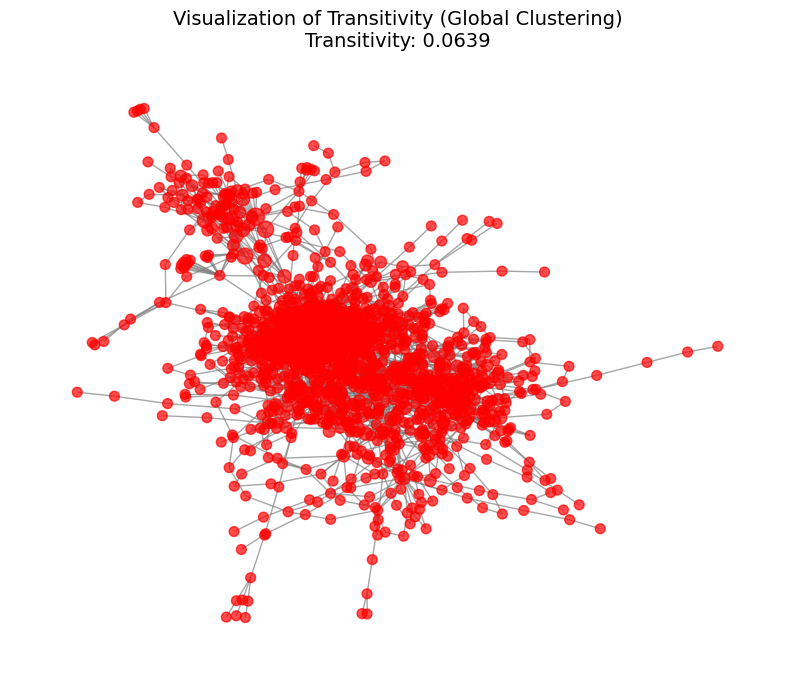

In [28]:
# Compute Transitivity (Global Clustering Coefficient)
transitivity = nx.transitivity(G)

print(f"Global Clustering Coefficient (Transitivity): {transitivity:.4f}")

triangle_counts = nx.triangles(G)

# Normalize triangle counts for visualization
max_triangles = max(triangle_counts.values()) if triangle_counts else 1
node_sizes = [50 + (500 * triangle_counts[n] / max_triangles) for n in G.nodes()]

# Draw the network with node size based on triangle participation
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axis explicitly
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization

nx.draw(G, pos, ax, node_size=node_sizes, node_color="red", alpha=0.7, with_labels=False, edge_color="gray")

plt.title(f"Visualization of Transitivity (Global Clustering)\nTransitivity: {transitivity:.4f}", fontsize=14)
plt.show()
